<a href="https://colab.research.google.com/github/minakshimohanty/Diabetic-Retinopathy-Detection/blob/master/Data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

APTOS and Aravind Eye Hospital, India provides the dataset, through their competition hosted on Kaggle. The link to the competition is: https://www.kaggle.com/c/aptos2019-blindness-detection/overview


In [76]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [78]:
#creating a dataframe with image id and diagnosis
df=pd.read_csv('/content/drive/My Drive/Capstone 1/labels.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [79]:
df.head(10)

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0
7,00a8624548a9,2
8,00b74780d31d,2
9,00cb6555d108,1


Text(0, 0.5, 'Number of Images')

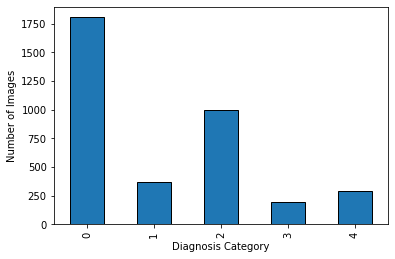

In [80]:
#visualizing data distribution in different categories
df['diagnosis'].value_counts().sort_index().plot.bar(edgecolor='black')
plt.xlabel('Diagnosis Category')
plt.ylabel('Number of Images')

In [81]:
df['diagnosis'].value_counts().sort_index()

0    1805
1     370
2     999
3     193
4     295
Name: diagnosis, dtype: int64

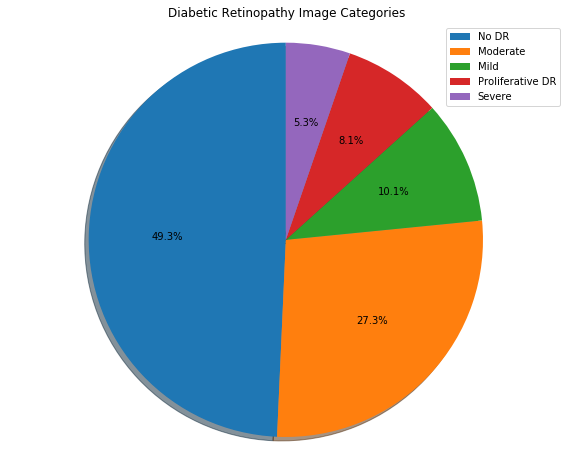

In [82]:
# Plot pie chart
labels = 'No DR', 'Moderate', 'Mild', 'Proliferative DR', 'Severe'
sizes = df.diagnosis.value_counts()


fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle= 90, labeldistance= None)
ax1.axis('equal')

plt.title('Diabetic Retinopathy Image Categories')
plt.legend()
plt.show()

Displaying images

In [0]:
#creating filename with path to load images
root='/content/drive/My Drive/Capstone 1/aptos_images/'
ext='.png'
filenames=[]
for id in df.id_code:
  path= root + id + ext
  filenames.append(path)


In [0]:
#updating dataframe df with filenames and path
df['filenames']=filenames

In [85]:
df.head()

,id_code,diagnosis,filenames
0,000c1434d8d7,2,/content/drive/My Drive/Capstone 1/aptos_image...
1,001639a390f0,4,/content/drive/My Drive/Capstone 1/aptos_image...
2,0024cdab0c1e,1,/content/drive/My Drive/Capstone 1/aptos_image...
3,002c21358ce6,0,/content/drive/My Drive/Capstone 1/aptos_image...
4,005b95c28852,0,/content/drive/My Drive/Capstone 1/aptos_image...


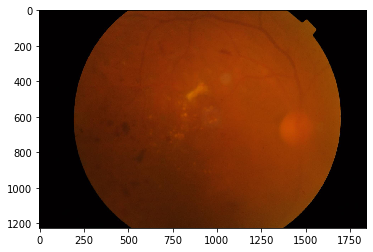

In [86]:
image = plt.imread(df['filenames'][20])
plt.imshow(image)

In [87]:
df[df.diagnosis==0].head(10)

,id_code,diagnosis,filenames
3,002c21358ce6,0,/content/drive/My Drive/Capstone 1/aptos_image...
4,005b95c28852,0,/content/drive/My Drive/Capstone 1/aptos_image...
6,0097f532ac9f,0,/content/drive/My Drive/Capstone 1/aptos_image...
10,00cc2b75cddd,0,/content/drive/My Drive/Capstone 1/aptos_image...
12,00f6c1be5a33,0,/content/drive/My Drive/Capstone 1/aptos_image...
15,0125fbd2e791,0,/content/drive/My Drive/Capstone 1/aptos_image...
17,014508ccb9cb,0,/content/drive/My Drive/Capstone 1/aptos_image...
18,0151781fe50b,0,/content/drive/My Drive/Capstone 1/aptos_image...
21,0182152c50de,0,/content/drive/My Drive/Capstone 1/aptos_image...
24,01d9477b1171,0,/content/drive/My Drive/Capstone 1/aptos_image...


/content/drive/My Drive/Capstone 1/aptos_images/002c21358ce6.png
/content/drive/My Drive/Capstone 1/aptos_images/005b95c28852.png
/content/drive/My Drive/Capstone 1/aptos_images/0097f532ac9f.png
/content/drive/My Drive/Capstone 1/aptos_images/00cc2b75cddd.png
/content/drive/My Drive/Capstone 1/aptos_images/00f6c1be5a33.png


Text(0.5, 1.0, 'No Diabetic Retinopathy')

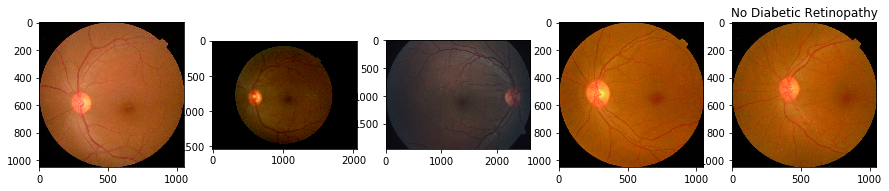

In [88]:
#Displaying five no diabetic retinopathy images

fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
no_DR=list(df['filenames'][df.diagnosis==0])

for i in range(5):
    fig.add_subplot(rows, columns, i+1)
    image=plt.imread(no_DR[i])
    plt.imshow(image)
    print(no_DR[i])

plt.title('No Diabetic Retinopathy')


In [0]:
df[df.diagnosis==0].head(10)


,id_code,diagnosis,filenames
3,002c21358ce6,0,/content/drive/My Drive/Capstone 1/aptos_image...
4,005b95c28852,0,/content/drive/My Drive/Capstone 1/aptos_image...
6,0097f532ac9f,0,/content/drive/My Drive/Capstone 1/aptos_image...
10,00cc2b75cddd,0,/content/drive/My Drive/Capstone 1/aptos_image...
12,00f6c1be5a33,0,/content/drive/My Drive/Capstone 1/aptos_image...
15,0125fbd2e791,0,/content/drive/My Drive/Capstone 1/aptos_image...
17,014508ccb9cb,0,/content/drive/My Drive/Capstone 1/aptos_image...
18,0151781fe50b,0,/content/drive/My Drive/Capstone 1/aptos_image...
21,0182152c50de,0,/content/drive/My Drive/Capstone 1/aptos_image...
24,01d9477b1171,0,/content/drive/My Drive/Capstone 1/aptos_image...


/content/drive/My Drive/Capstone 1/aptos_images/0024cdab0c1e.png
/content/drive/My Drive/Capstone 1/aptos_images/00cb6555d108.png
/content/drive/My Drive/Capstone 1/aptos_images/0124dffecf29.png
/content/drive/My Drive/Capstone 1/aptos_images/01b3aed3ed4c.png
/content/drive/My Drive/Capstone 1/aptos_images/0369f3efe69b.png


Text(0.5, 1.0, 'Mild Diabetic Retinopathy')

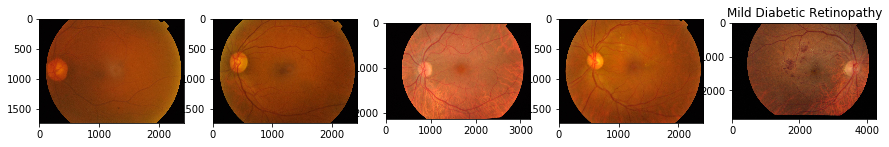

In [89]:
#Displaying five mild diabetic retinopathy images
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
DR_1=list(df['filenames'][df.diagnosis==1])

for i in range(5):
    fig.add_subplot(rows, columns, i+1)
    image=plt.imread(DR_1[i])
    plt.imshow(image)
    print(DR_1[i])
plt.title('Mild Diabetic Retinopathy')

/content/drive/My Drive/Capstone 1/aptos_images/000c1434d8d7.png
/content/drive/My Drive/Capstone 1/aptos_images/00a8624548a9.png
/content/drive/My Drive/Capstone 1/aptos_images/00b74780d31d.png
/content/drive/My Drive/Capstone 1/aptos_images/00e4ddff966a.png
/content/drive/My Drive/Capstone 1/aptos_images/012a242ac6ff.png


Text(0.5, 1.0, 'Moderate Diabetic Retinopathy')

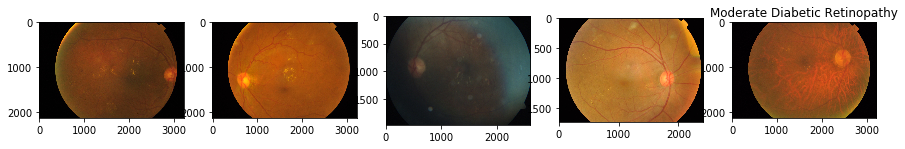

In [90]:
#Displaying five moderate diabetic retinopathy images
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
DR_2=list(df['filenames'][df.diagnosis==2])

for i in range(5):
    fig.add_subplot(rows, columns, i+1)
    image=plt.imread(DR_2[i])
    plt.imshow(image)
    print(DR_2[i])
plt.title('Moderate Diabetic Retinopathy')

/content/drive/My Drive/Capstone 1/aptos_images/0104b032c141.png
/content/drive/My Drive/Capstone 1/aptos_images/03c85870824c.png
/content/drive/My Drive/Capstone 1/aptos_images/042470a92154.png
/content/drive/My Drive/Capstone 1/aptos_images/05cd0178ccfe.png
/content/drive/My Drive/Capstone 1/aptos_images/069f43616fab.png


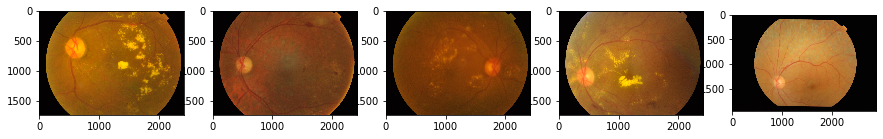

In [0]:
##Displaying five moderate diabetic retinopathy images
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
DR_3=list(df['filenames'][df.diagnosis==3])

for i in range(5):
    fig.add_subplot(rows, columns, i+1)
    image=plt.imread(DR_3[i])
    plt.imshow(image)
    print(DR_3[i])
plt.title('Severe Diabetic Retinopathy')

/content/drive/My Drive/Capstone 1/aptos_images/001639a390f0.png
/content/drive/My Drive/Capstone 1/aptos_images/0083ee8054ee.png
/content/drive/My Drive/Capstone 1/aptos_images/0243404e8a00.png
/content/drive/My Drive/Capstone 1/aptos_images/02685f13cefd.png
/content/drive/My Drive/Capstone 1/aptos_images/02dda30d3acf.png


Text(0.5, 1.0, 'Proliferative Diabetic Retinopathy')

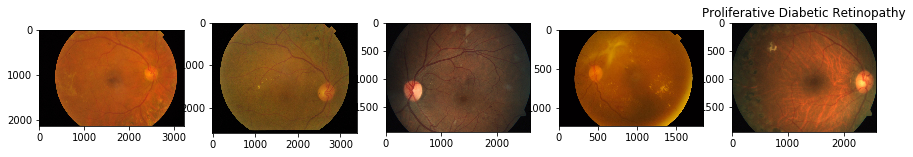

In [91]:
#Displaying five proliferative diabetic retinopathy images
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
DR_4=list(df['filenames'][df.diagnosis==4])

for i in range(5):
    fig.add_subplot(rows, columns, i+1)
    image=plt.imread(DR_4[i])
    plt.imshow(image)
    print(DR_4[i])

plt.title('Proliferative Diabetic Retinopathy')


In [0]:
#Splitting dataset into train and test images
from sklearn.model_selection import train_test_split





train_files, test_files, train_labels, test_labels = train_test_split(df['filenames'].values,
                                                              df['diagnosis'].values,
                                                              test_size=0.3, random_state=42)
print(train_files.shape, test_files.shape)



(2563,) (1099,)


In [0]:
#checking dimensions of images and resizing images
import cv2

def get_image_sizes(idx, file):
  return cv2.imread(file).shape

train_image_size = []
train_idx=[]
train_file=[]
for idx, file in enumerate(train_files):
  train_image_size.append(get_image_sizes(idx, file))
  

In [93]:
#total number of training images
len(train_image_size)

2563

In [96]:
#Summary statistics on training image sizes
print('Minimum dimensions:'+ str(np.min(train_image_size, axis=0)))
print('Maximum dimensions:'+ str(np.max(train_image_size, axis=0)))
print('Average dimensions:'+ str(np.mean(train_image_size, axis=0)))
print('Median dimensions:'+ str(np.median(train_image_size, axis=0)))

Minimum dimensions:[480 640   3]
Maximum dimensions:[2848 4288    3]
Average dimensions:[1528.82676551 2018.98556379    3.        ]
Median dimensions:[1536. 2144.    3.]


In [0]:
#Resizing images to standard (224, 224) pixels
import cv2

resize_dim = (224, 224)
def get_image_sizes(idx, file):
    img = cv2.imread(file)
    img = cv2.resize(img, dsize=resize_dim,
                     interpolation=cv2.INTER_CUBIC)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img, dtype=np.float32)
    return img

train_data_read = [get_image_sizes(idx, img) for idx, img in enumerate(train_files)]
test_data_read = [get_image_sizes(idx, img) for idx, img in enumerate(test_files)]
train_data = np.array(train_data_read)
test_data = np.array(test_data_read)
print('train data shape is' + str(train_data.shape))
print('test data shape is' + str(test_data.shape))

train data shape is(2563, 224, 224, 3)


In [0]:
test_data.shape

(1099, 256, 256, 3)

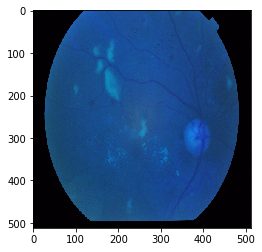

In [0]:
#viewing resized training image
plt.imshow(train_data[104]/255)

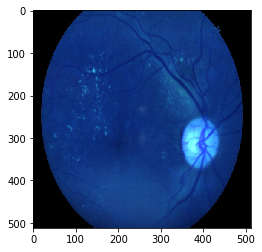

In [0]:
#viewing resized training image
plt.imshow(train_data[2000]/255)

In [0]:
#saving train and test data to numpy arrays
from numpy import save
save('/content/drive/My Drive/Capstone 1/train_data_224.npy', train_data)
save('/content/drive/My Drive/Capstone 1/train_labels_224.npy', train_labels)
save('/content/drive/My Drive/Capstone 1/test_data_224.npy', test_data)
save('/content/drive/My Drive/Capstone 1/test_labels_224.npy', test_labels)